<!-- #### --  4 task ( problem ) ----
    > responce coding for categorical data
    > https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2971/handling-categorical-and-numerical-features/3/module-3-foundations-of-natural-language-processing-and-machine-learning    
 -->

# <b>GBDT Assignment </b>

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        
    </li>
    <li> Here in response encoding you need to apply the <strong>laplase smoothing</strong> value for test set. Laplase smoothing means, If test point is present in test but not in train then you need to apply default 0.5 as probability value for that data point (Refer the Response Encoding Image from above cell) </li>
    <li>Please use atleast <strong> 35k </strong> data points </li></ul>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

# Few Notes

1. Use atleast 35k data points
2. Use classifier.Predict_proba() method instead of predict() method while calculating roc_auc scores
3. Be sure that you are using laplase smoothing in response encoding function. Laplase smoothing means applying the default (0.5) value to test data if the test data is not present in the train set


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
import pdb 
import lightgbm as lgb


from sklearn.ensemble import GradientBoostingClassifier

import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

or else , you can use below code

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

## 1.1 Loading Data

In [3]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
data = pd.read_csv('preprocessed_data.csv', nrows = 35000)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   school_state                                  35000 non-null  object 
 1   teacher_prefix                                35000 non-null  object 
 2   project_grade_category                        35000 non-null  object 
 3   teacher_number_of_previously_posted_projects  35000 non-null  int64  
 4   project_is_approved                           35000 non-null  int64  
 5   clean_categories                              35000 non-null  object 
 6   clean_subcategories                           35000 non-null  object 
 7   essay                                         35000 non-null  object 
 8   price                                         35000 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 2.4+ MB


In [5]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [6]:
# saperating yi's
data_target = data['project_is_approved'].values
data1 = data
data = data.drop(['project_is_approved'],axis=1)



In [7]:
# data distribution

data1['project_is_approved'].value_counts()

1    29629
0     5371
Name: project_is_approved, dtype: int64

In [8]:
data_target.shape

(35000,)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>


In [9]:
# 1. Split your data. train test split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data,data_target, test_size=0.20, stratify=data_target)
X_train1, X_cv, y_train1, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

In [10]:
X_train.shape, X_test.shape, data.shape,y_train.shape


((28000, 8), (7000, 8), (35000, 8), (28000,))

### Text Feature  - " essay "
#### 3. perform tfidf vectorization. 

In [11]:
# tfidf for feature "essay" used for set-1

vectorizer = TfidfVectorizer(ngram_range= (1,4), max_features=5000, min_df=10)
vectorizer_ess = vectorizer.fit(X_train['essay'].values)

X_tr_essay_tfidf = vectorizer_ess.transform(X_train['essay'].values)
X_te_essay_tfidf = vectorizer_ess.transform(X_test['essay'].values)
X_cv_essay_tfidf = vectorizer_ess.transform(X_cv['essay'].values)

print("After vectorizations")
print(X_tr_essay_tfidf.shape, y_train.shape)

After vectorizations
(28000, 5000) (28000,)


In [12]:
# X_tr_essay_tfidf = X_tr_essay_tfidf.toarray()
# X_tr_essay_tfidf = X_te_essay_tfidf.toarray()
# X_cv_essay_tfidf = X_cv_essay_tfidf.toarray()
type(X_tr_essay_tfidf)

scipy.sparse.csr.csr_matrix

  #### 4. perform tfidf w2v vectorization of text data.

**loading glove words**

In [13]:
#please use below code to load glove vectors
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [14]:
# part2 - average Word2Vec
# compute tfidf-word2vec   for each review.
def cal_tfidf_word2vec(essay,vectorizer):  # essay is series
    
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
    tfidf_words = set(vectorizer.get_feature_names())

    
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    
    for sentence in essay.values: # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
                
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
        
        
    return np.array(tfidf_w2v_vectors)




In [15]:
%%time

X_tr_essay_tfidf_w2v = cal_tfidf_word2vec(X_train['essay'], vectorizer_ess)
X_te_essay_tfidf_w2v = cal_tfidf_word2vec(X_test['essay'], vectorizer_ess)
X_cv_essay_tfidf_w2v = cal_tfidf_word2vec(X_cv['essay'], vectorizer_ess)

print("essay feature as tfidf_w2v :",X_tr_essay_tfidf_w2v.shape, X_te_essay_tfidf_w2v.shape, X_cv_essay_tfidf_w2v.shape)


essay feature as tfidf_w2v : (28000, 300) (7000, 300) (5600, 300)
Wall time: 1min 54s


In [16]:
print("essay feature as tfidf_w2v :",X_tr_essay_tfidf_w2v.shape, X_te_essay_tfidf_w2v.shape, X_cv_essay_tfidf_w2v.shape)


essay feature as tfidf_w2v : (28000, 300) (7000, 300) (5600, 300)


## BOW for 5 features
5. perform encoding of categorical features.

#### response coding 

In [17]:
def rc_table(data,y):
    word_dict_of_prob = {}
    table = []
    c0,c1 = [],[]  # count of x for both class 
    uni_x = list(set(data))
    
    data_y_0 = [x for i,x in enumerate(data) if y[i] == 0 ]  
    data_y_1 = [x  for i,x in enumerate(data) if y[i] == 1 ] 
    
    for x in uni_x:
        
        c0.append(data_y_0.count(x))
        c1.append(data_y_1.count(x))
    
    for i,x in enumerate(uni_x):
        try:
            prob_x_0 = c0[i]/(c0[i]+c1[i])
            prob_x_1 = c1[i]/(c0[i]+c1[i])  
            table.append([prob_x_0, prob_x_1])
        except:
            pdb.set_trace()
        
    for i, x in enumerate(data):
        
        for i2, j in enumerate(uni_x):
            if x == j :
                word_dict_of_prob[x] = [table[i2][0],table[i2][1]]
 

    return word_dict_of_prob

def response_coding(word_dict_of_prob, data):  # taking dictionary type and series type value
    
    rc_data = []
    uni_words = word_dict_of_prob.keys()
    
    for i in data:
        if i in uni_words:
            rc_data.append(word_dict_of_prob[i])
            
        else :
            rc_data.append([0.5,0.5])
    
    return np.array(rc_data)
    
    
    

In [18]:
# word_dict_of_prob = rc_table(X_train['school_state'].values[:100], y_train[:100])
# # word_dict_of_prob
# responce_codeing(word_dict_of_prob, X_train['school_state'].values[100:1000]) 

In [19]:
# data.head()

In [20]:
#responce encoding of 5 feature in data

# responce encoding of School state

word_dict_of_prob = rc_table(X_train['school_state'].values, y_train) # return word_dict_of_prob for both class

X_tr_state_rc = response_coding(word_dict_of_prob, X_train['school_state'].values)
X_te_state_rc = response_coding(word_dict_of_prob, X_test['school_state'].values)
X_cv_state_rc = response_coding(word_dict_of_prob, X_cv['school_state'].values)


# responce encoding of teacher prefix
word_dict_of_prob = rc_table(X_train['teacher_prefix'].values, y_train)

X_tr_teacher_rc = response_coding(word_dict_of_prob, X_train['teacher_prefix'].values)
X_te_teacher_rc = response_coding(word_dict_of_prob, X_test['teacher_prefix'].values)
X_cv_teacher_rc = response_coding(word_dict_of_prob, X_cv['teacher_prefix'].values)

# responce encoding of project grade category
word_dict_of_prob = rc_table(X_train['project_grade_category'].values, y_train)

X_tr_grade_rc = response_coding(word_dict_of_prob, X_train['project_grade_category'].values)
X_te_grade_rc = response_coding(word_dict_of_prob, X_test['project_grade_category'].values)
X_cv_grade_rc = response_coding(word_dict_of_prob, X_cv['project_grade_category'].values)

# responce encoding of clean_subcategories

word_dict_of_prob = rc_table(X_train['clean_categories'].values, y_train)

X_tr_cate_rc = response_coding(word_dict_of_prob, X_train['clean_categories'].values)
X_te_cate_rc = response_coding(word_dict_of_prob, X_test['clean_categories'].values)
X_cv_cate_rc = response_coding(word_dict_of_prob, X_cv['clean_categories'].values)



# responce encoding of clean_subcategories

word_dict_of_prob = rc_table(X_train['clean_subcategories'].values, y_train)

X_tr_sub_cate_rc = response_coding(word_dict_of_prob, X_train['clean_subcategories'].values)
X_te_sub_cate_rc = response_coding(word_dict_of_prob, X_test['clean_subcategories'].values)
X_cv_sub_cate_rc = response_coding(word_dict_of_prob, X_cv['clean_subcategories'].values)



# 5-responce encoding features
X_tr_state_rc.shape, X_tr_teacher_rc.shape, X_tr_grade_rc.shape, X_tr_cate_rc.shape, X_tr_sub_cate_rc.shape

((28000, 2), (28000, 2), (28000, 2), (28000, 2), (28000, 2))

#### Normalization 
6. perform encoding of numerical features

In [21]:
# normalization of 2 numerical features - price and project_posted_by teacher
from sklearn.preprocessing import Normalizer


# normalization of numerical features - price
normalizer = Normalizer()
normalizer.fit(data['price'].values.reshape(1,-1))      # normalizer.fit(X_train['price'].values) # showing error as Reshape your data either using array.reshape(-1, 1) or using array.reshape(1, -1)  

X_tr_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_te_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))



# normalization of numerical features - teacher_number_of_previously_posted_projects
normalizer = Normalizer()
normalizer.fit(data['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_tr_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_te_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


X_tr_price_norm.shape,X_tr_projects_norm.shape

((28000, 1), (28000, 1))

#### sentiment analyzer for text data 
1. calculate sentiment scores for the essay feature 

In [22]:
# sentiment analyzer 

sid = SentimentIntensityAnalyzer()

def sentiment_score(analyzer_obj, data):
    sentiment_score = []
    
    for sentence in data.values:
        
        senti = sid.polarity_scores(sentence)    
        #sentiment_score = np.append(sentiment_score,list(senti.values()))
        sentiment_score.append(list(senti.values()))

    
    return np.array(sentiment_score)

X_tr_sentiment_score = sentiment_score(sid, X_train['essay'])
X_te_sentiment_score = sentiment_score(sid, X_test['essay'])
X_cv_sentiment_score = sentiment_score(sid, X_cv['essay'])

X_tr_sentiment_score.shape ,X_te_sentiment_score.shape , X_cv_sentiment_score.shape 

((28000, 4), (7000, 4), (5600, 4))

#### making 2 set with diff-2 feature

    Set 1: categorical, numerical features + preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay) + responce coding


    Set 2: categorical, numerical features + preprocessed_essay (TFIDF ) + Sentiment scores(preprocessed_essay) + responce coding

In [23]:
from scipy.sparse import hstack
# for set 1 - categorical, numerical features + preprocessed_essay (TFIDF) + Sentiment scores

S1_X_tr = hstack((X_tr_state_rc, X_tr_teacher_rc, X_tr_grade_rc, X_tr_cate_rc, X_tr_sub_cate_rc, X_tr_sentiment_score, X_tr_projects_norm, X_tr_price_norm, X_tr_essay_tfidf)).tocsr()
S1_X_te = hstack((X_te_state_rc, X_te_teacher_rc, X_te_grade_rc, X_te_cate_rc, X_te_sub_cate_rc, X_te_sentiment_score, X_te_projects_norm, X_te_price_norm, X_te_essay_tfidf)).tocsr()
S1_X_cv = hstack((X_cv_state_rc, X_cv_teacher_rc, X_cv_grade_rc, X_cv_cate_rc, X_cv_sub_cate_rc, X_cv_sentiment_score, X_cv_projects_norm, X_cv_price_norm, X_cv_essay_tfidf)).tocsr()



print("Final Data matrix for set 1")
print(S1_X_tr.shape, S1_X_te.shape, S1_X_cv.shape)
print("="*100)




Final Data matrix for set 1
(28000, 5016) (7000, 5016) (5600, 5016)


In [24]:


# for set 2 -  categorical, numerical features + preprocessed_essay (TFIDF W2v) + Sentiment scores


# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
S2_X_tr = np.hstack((X_tr_state_rc, X_tr_teacher_rc, X_tr_grade_rc, X_tr_cate_rc, X_tr_sub_cate_rc, X_tr_sentiment_score, X_tr_projects_norm, X_tr_price_norm, X_tr_essay_tfidf_w2v))
S2_X_te = np.hstack((X_te_state_rc, X_te_teacher_rc, X_te_grade_rc, X_te_cate_rc, X_te_sub_cate_rc, X_te_sentiment_score, X_te_projects_norm, X_te_price_norm, X_te_essay_tfidf_w2v))
S2_X_cv = np.hstack((X_cv_state_rc, X_cv_teacher_rc, X_cv_grade_rc, X_cv_cate_rc, X_cv_sub_cate_rc, X_cv_sentiment_score, X_cv_projects_norm, X_cv_price_norm, X_cv_essay_tfidf_w2v))

print("Final Data matrix for set 2")
print(S1_X_tr.shape, S1_X_te.shape, S1_X_cv.shape)
print("="*100)



Final Data matrix for set 2
(28000, 5016) (7000, 5016) (5600, 5016)


## modeling on set1 feature


#### 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.

In [27]:
y_train[y_train==1].shape, y_train[y_train==0].shape, S1_X_tr.shape, y_train.shape

((23703,), (4297,), (28000, 5016), (28000,))

In [28]:
%%time
# hyperparameter with sklearn
# took long time to execute

parameters = {'max_depth': [1, 3, 10, 30], 'min_child_samples':[10, 20, 40, 80] }

model = lgb.LGBMClassifier( class_weight= 'balanced' )
clf_hyper = GridSearchCV(model, parameters, scoring ="roc_auc", n_jobs = -1).fit(S1_X_tr,y_train)

print('best parameter',clf_hyper.best_params_)



best parameter {'max_depth': 30, 'min_child_samples': 80}
Wall time: 16min 9s


In [29]:
# clf_hyper.predict(X_train)
S1_X_tr.shape

(28000, 5016)

In [29]:
# without reg_lambda model is overfitting , hence we manually hyper-tune reg_lambda parameter 


print('best parameter',clf_hyper.best_params_)
train_auc = roc_auc_score(y_train, clf_hyper.predict(S1_X_tr))
test_auc = roc_auc_score(y_test, clf_hyper.predict(S1_X_te))

print(train_auc, test_auc)

best parameter {'max_depth': 30, 'min_child_samples': 80}
0.8607903222830907 0.6569168409137902


### best model

{'max_depth': 30, 'min_data_in_leaf': 40}

In [33]:
#shape of dataset

S1_X_tr.shape

(28000, 5016)

In [42]:
%%time

# best model with lightGbm  ref - https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python/notebook ; https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
best_clf = lgb.LGBMClassifier(reg_lambda = 10000, max_depth =30, min_child_samples = 80 ,class_weight= 'balanced',  n_estimators= 100  )
best_clf.fit(S1_X_tr,y_train)

#predicting class
tr_y_pred = best_clf.predict(S1_X_tr)
te_y_pred = best_clf.predict(S1_X_te)

# predicting probability
tr_y_prob = best_clf.predict_proba(S1_X_tr)
te_y_prob = best_clf.predict_proba(S1_X_te)

train_auc = roc_auc_score(y_train, tr_y_pred)
test_auc = roc_auc_score(y_test, te_y_pred)

print("train auc :-",train_auc,"test auc :-",test_auc)

train auc :- 0.6831163724946182 test auc :- 0.626181156674089
Wall time: 27.3 s


In [43]:
print("train auc :-",train_auc,"test auc :-",test_auc) 

train auc :- 0.6831163724946182 test auc :- 0.626181156674089


### 1.3 Representation of results

#### Heatmap on mean_test_score  
    correnponding to the each hyperparameter

In [45]:
# reshaping 'mean_test_score' in (4,5) for heatmap 
cv_accu = clf_hyper.cv_results_['mean_test_score']
cv_accu = np.reshape(cv_accu, (4,4))
cv_accu.shape

NameError: name 'clf_hyper' is not defined

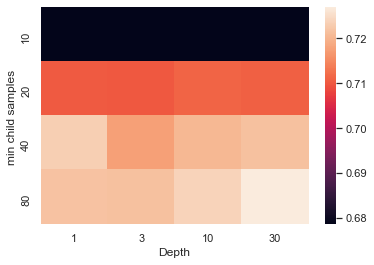

In [132]:

np.random.seed(0)
sns.set_theme()

pd_cv_accu = pd.DataFrame(cv_accu , columns = [1, 3, 10, 30], index =  [10, 20, 40, 80])

# with ->  vmin= min(cv_accu), vmax= max(cv_accu)
ax = sns.heatmap(pd_cv_accu, vmin=np.min(cv_accu), vmax=np.max(cv_accu))
plt.xlabel("Depth")
plt.ylabel("min child samples ")
plt.title("Heatmap on mean_test_score")# to update - run it once

plt.show()

#### ROC plot for train and test data

In [39]:

tr_fpr,tr_tpr,_ = roc_curve(y_train,tr_y_prob[:,1])
te_fpr,te_tpr,_ = roc_curve(y_test,te_y_prob[:,1])


No handles with labels found to put in legend.


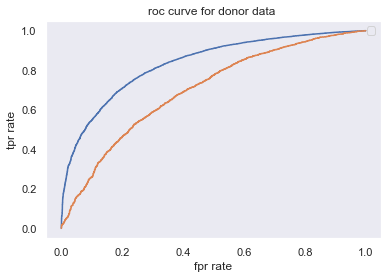

In [40]:


plt.plot(tr_fpr,tr_tpr)
plt.plot(te_fpr,te_tpr)
plt.xlabel("fpr rate")
plt.ylabel("tpr rate")

plt.title("roc curve for donor data ")
plt.legend()
plt.grid()
plt.show()

#### confusion matrix 

In [41]:
ar = confusion_matrix(y_train,tr_y_pred)
ar2 = confusion_matrix(y_test,te_y_pred)   
tn, fp, fn, tp = confusion_matrix(y_train,tr_y_pred).ravel()
ar,ar2

(array([[ 3347,   950],
        [ 6343, 17360]], dtype=int64),
 array([[ 633,  441],
        [1792, 4134]], dtype=int64))

#### 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.


In [42]:
false_positive = []

# false_positive.append   if x= 0 and y=1 

for idx,x in enumerate(zip(y_train,tr_y_pred)):
    
    y_true,y_pred = x
    
    if y_true== 0 and y_pred == 1 :
        false_positive.append(idx)
    
false_positive = np.array(false_positive)  
false_positive.shape,type(false_positive)

((950,), numpy.ndarray)

#### word cloud

------------ WordCloud for all false pasitive(- negetive words actually classified as positive)words occur ------------


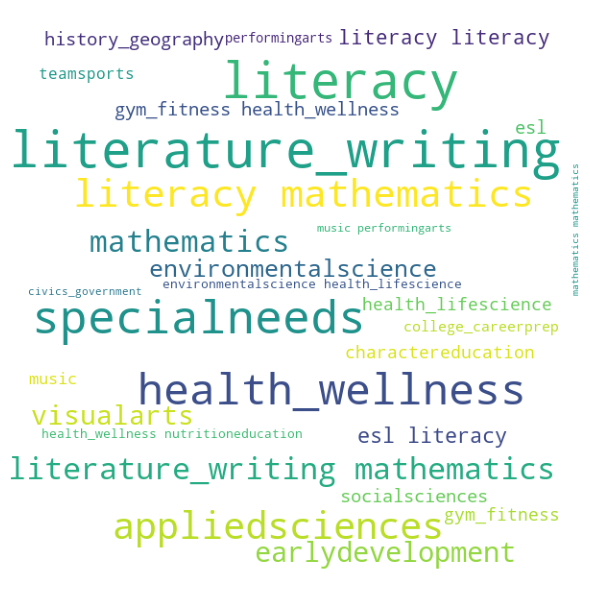

In [43]:
# Python program to generate WordCloud for all false positive datapoints'essay feacture

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

# Reads 'Youtube04-Eminem.csv' file
df = false_positive

comment_words = ''
stopwords = set(STOPWORDS)
print("------------ WordCloud for all false pasitive(- negetive words actually classified as positive)words occur ------------")
# iterate through the csv file
for v in df:
	val = data1.iloc[v,6]
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 600, height = 600,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


 here  - these are the negetive points by which we consider poject is_approved(=1) 
 
**observation**

     - projects related to helth_wellness, applidsciences, early_development, literature_writing, literacy, heath are
     pridicted positive(accepted of funders)  but it is actually negative.   


#### Box plot 
    -  with the `price` of these `false positive data points`

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


Text(0.5, 1.0, 'false positive point')

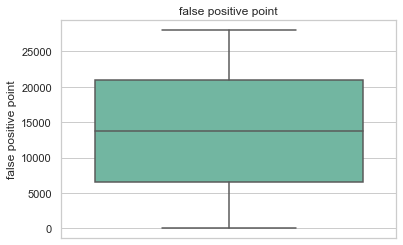

In [45]:

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(y=false_positive, orient = "h", palette="Set2")
plt.ylabel('false positive point')
plt.title("false positive point")

#### pdf

In [46]:
false_pt_df = data1.loc[false_positive]


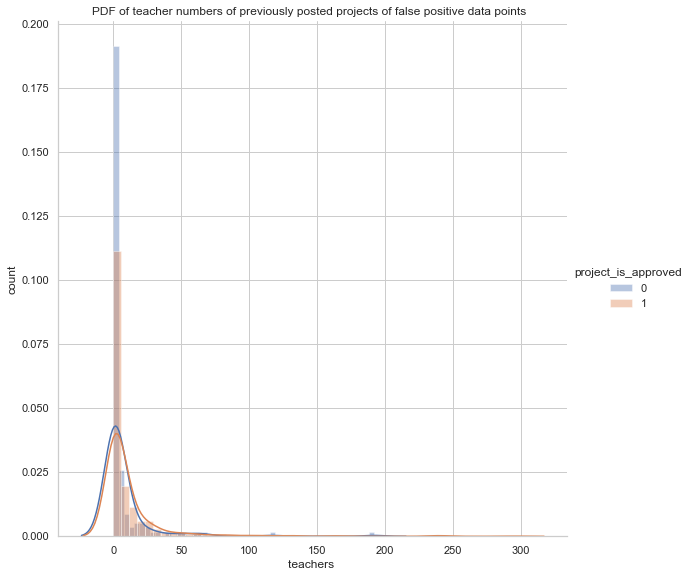

In [47]:
import warnings
# adding column


# Op_Year

warnings.filterwarnings('ignore')

sns.FacetGrid(false_pt_df, hue="project_is_approved", size=8) \
   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
   .add_legend()\
   .set(xlabel='teachers ', ylabel='count');
plt.title("PDF of teacher numbers of previously posted projects of false positive data points  ")
plt.show();


**observation:**

        > most of teacher did not previously posted poject classied as positive pts by the model
        

### set_2  features   
feature - Set 2: categorical, numerical features + preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)

In [52]:
import time


In [53]:
%%time
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.



parameters = {'max_depth': [10, 30, 50, 70], 'min_child_samples':[10, 20, 40, 60], 'reg_lambda':[.001,.01,1,100] }

model2 = lgb.LGBMClassifier( class_weight= 'balanced', n_estimators= 150)


clf_hyper = GridSearchCV( model2, parameters, scoring = 'roc_auc', n_jobs = -1 , cv = 10 ).fit(S2_X_tr,y_train)




Wall time: 1h 20min 19s


In [54]:
print('best parameter',clf_hyper.best_params_)


best parameter {'max_depth': 10, 'min_child_samples': 60, 'reg_lambda': 100}


#### best model

In [63]:
%%time

best_m2 = lgb.LGBMClassifier(reg_lambda = 1000, max_depth =clf_hyper.best_params_['max_depth'],min_child_samples = clf_hyper.best_params_['min_child_samples'] ,class_weight= 'balanced', n_estimators= 80  )

best_m2.fit(S2_X_tr,y_train)

tr_y_pred = best_m2.predict(S2_X_tr)
te_y_pred = best_m2.predict(S2_X_te)

tr_accu_auc = roc_auc_score(y_train,tr_y_pred)
te_accu_auc = roc_auc_score(y_test,te_y_pred)

tr_accu_auc,te_accu_auc

Wall time: 7.18 s


(0.7289158224031622, 0.6147507653361037)

# <font color='red'> <b>Task - 2</b></font>

In [27]:
%%time
# 1. write your code in following steps for task 2

print("shape of dataset set1",S1_X_tr.shape)

S1_X_tr_cpy = S1_X_tr.toarray()
imp_features = best_clf.feature_importances_

# 2. select all non zero features
list_idx = [i for i,x in enumerate(imp_features) if x>0  ]

# 3. Update your dataset i.e. X_train,X_test and X_cv so that it contains all rows and only non zero features
data_set_compress = S1_X_tr_cpy[:,list_idx]





# split data
X, X_cv, y, y_cv = train_test_split(data_set_compress, y_train, test_size=.20, stratify= y_train)

print("after compressing",data_set_compress.shape)

shape of dataset set1 (28000, 5016)
after compressing (28000, 869)
Wall time: 1.12 s


In [28]:
%%time
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.

parameters = {'max_depth': [1, 3, 10, 30], 'min_child_samples':[10, 20, 40, 80] }

parameters = {'max_depth': [10, 30, 50, 70], 'min_child_samples':[10, 20, 40, 60],  }

model = lgb.LGBMClassifier( class_weight= 'balanced', n_estimators= 150)


clf_hyper3 = GridSearchCV( model, parameters, scoring = 'roc_auc', n_jobs = 1 , cv = 10 ).fit(X,y)





print('best parameter',clf_hyper3.best_params_)


best parameter {'max_depth': 30, 'min_child_samples': 40}
Wall time: 23min 11s


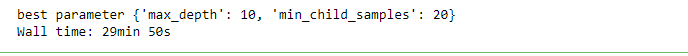


### 5. Fit the best model. Plot ROC AUC curve and confusion matrix similar to model 1.


In [35]:
# best_m3 = GradientBoostingClassifier(max_depth = clf_hyper2.best_params_['max_depth'], min_samples_split =clf_hyper2.best_params_['min_samples_split'])
# best_m3 = GradientBoostingClassifier(max_depth = 30, min_samples_split =40, reg_lambda = 1000)
best_m3 = lgb.LGBMClassifier(reg_lambda = 10000, max_depth =30,min_child_samples = 40 ,class_weight= 'balanced', n_estimators= 100  )

best_m3.fit(X,y)

tr_y_pred = best_m3.predict(X)
te_y_pred = best_m3.predict(X_cv)

tr_accu_auc = roc_auc_score(y,tr_y_pred)
te_accu_auc = roc_auc_score(y_cv,te_y_pred)

tr_accu_auc,te_accu_auc

(0.6876605696006691, 0.6399886654918001)

#### ROC Curve

In [36]:
# predicting probability
tr_y_prob = best_m3.predict_proba(X)
te_y_prob = best_m3.predict_proba(X_cv)

# calculating roc curve
fpr1, tpr1,_ = roc_curve(y, tr_y_prob[:,1])
fpr2, tpr2,_ = roc_curve(y_cv, te_y_prob[:,1])


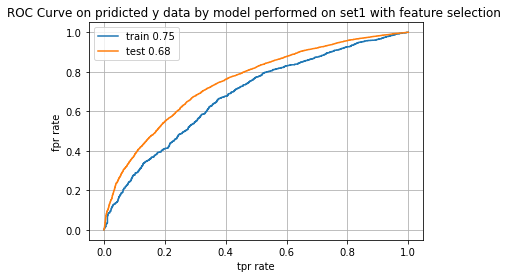

In [38]:
from sklearn.metrics import auc

plt.plot(fpr2,tpr2, label= "train %0.2f"% auc(fpr1,tpr1))
plt.plot(fpr1,tpr1, label= "test %0.2f"% auc(fpr2,tpr2))

plt.xlabel("tpr rate")
plt.ylabel("fpr rate")
plt.legend()
plt.title("ROC Curve on pridicted y data by model performed on set1 with feature selection ")

plt.grid()
plt.show()

#### confusion matrix

In [ ]:
tr_cm = confusion_matrix(y,tr_y_pred)
te_cm = confusion_matrix(y_cv,te_y_pred)

tr_cm,te_cm

### Tabulate your results


In [ ]:
# !pip install prettytable

In [44]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Vectorizer", "Model", "Hyper Parameter","Train AUC"," Test AUC" ])
  
# Add rows
myTable.add_rows(
    [
         
        ["TFIDF", "Decision Tree", "{max_depth :10 ,  min_samples_split :500}"," 0.6571","0.5796" ],
        
        ["TFIDF W2V", "Decision Tree", " {'max_depth': 3, 'min_samples_split': 5}"," 0.5926","0.5689" ],
        
        ["TFIDF -imp feature", "Decision Tree", " {'max_depth': 10, 'min_samples_split': 500}"," 0.6678","0.5762 \n" ],
    
        ["TFIDF + rc", "LGBMClassifier", "{'max_depth': 30, 'min_child_samples': 80, 'reg_lambda': 10000}","0.6831","0.6261" ],
        ["TFIDF-W2V + rc", "LGBMClassifier", "{'max_depth': 10, 'min_child_samples': 60, 'reg_lambda': 1000}"," 0.7289","0.6147" ],
        ["TFIDF-imp feature", "LGBMClassifier", "{'max_depth': 30, 'min_child_samples': 40, 'reg_lambda': 10000}","0.6876","0.6399" ],

    
    
    ]
)

print(myTable)




+--------------------+----------------+-----------------------------------------------------------------+-----------+-----------+
|     Vectorizer     |     Model      |                         Hyper Parameter                         | Train AUC |  Test AUC |
+--------------------+----------------+-----------------------------------------------------------------+-----------+-----------+
|       TFIDF        | Decision Tree  |            {max_depth :10 ,  min_samples_split :500}            |   0.6571  |   0.5796  |
|     TFIDF W2V      | Decision Tree  |             {'max_depth': 3, 'min_samples_split': 5}            |   0.5926  |   0.5689  |
| TFIDF -imp feature | Decision Tree  |            {'max_depth': 10, 'min_samples_split': 500}          |   0.6678  |  0.5762   |
|                    |                |                                                                 |           |           |
|     TFIDF + rc     | LGBMClassifier |  {'max_depth': 30, 'min_child_samples': 80, 'reg_l

#### note :
<!-- without given class weightage model is very week  -->